# Exercise: Complete Modeling Workflow (With Answers)

**Download: ``http://shorturl.at/crOS2/Lecture_12``**

File obsdata.csv contains four columns, each with 20 points. The columns are: time, A, B, C. 
1. Evaluate each of the following models using cross validation to find which provides the best fit.

    Model 1:

        A -> B

        B -> C


    Model 2:

         A -> B

         A -> C

    Model 3:

         A + B -> C

    All kinetics are mass action. A is starts at 5M, and all other concentrations are 0.
    Kinetics constants are in [0, 10]
    
    a. Write the full Antimony models for each of the above.
    
    b. What simulation time should you use? How many points?
    
    c. Do cross validation on each. Which has the largest $R^2$ across folds?
    
    d. Did some folds in cross validation produce much better fits than others? Why?

2. Construct a 95% confidence interval for the model with the best fit.

3. The "observational data" were generated by a model that contains a chemical species D that is not present in the other models. How might we detect that there is a missing chemical species?

Hint: You can read data in a CSV file into a numpy array using ``np.genfromtxt("obsdata.csv", delimiter=",", skip_header=True)``.

## Checkpoints
1. Antimony models. Insert kinetics and constant initializations.
1. Plot observational data, identifying time periods over which fitting is done.
1. Cross validation results
   1. Model 1
   1. Model 2
   1. Model 3
1. Choice for "best model"
1. Parameter estimates and evaluation.

In [1]:
%matplotlib inline
import numpy as np
import model_fitting as mf

In [2]:
# Globals
num_points = 30
sim_time = 30

## Full model

In [3]:
# Model used in this example
model0 = """
     # True model
     A  -> B; k1*A
     A + B -> D; k2*A*B
     D -> C; k3*D
      
     A = 5;
     B = 0;
     C = 0;
     D = 0;
     k1 = 0.5
     k2 = 0.2
     k3 = 0.1
"""
unfitted_parameters = mf.makeParameters(constants=['k1', 'k2', 'k3'])
unfitted_parameters

name,value,initial value,min,max,vary
k1,1.00000000,1,0.00000000,10.0000000,True
k2,1.00000000,1,0.00000000,10.0000000,True
k3,1.00000000,1,0.00000000,10.0000000,True


In [4]:
noise_std = 0.2
full_obs_data = mf.makeObservations(model=model0, noise_std=noise_std, num_points=num_points, sim_time=sim_time)
obs_data = full_obs_data[:, [0, 1, 2,  4]]
obs_data

 [[       0,    5.07507, 0.0294192,         0],
  [ 1.03448,    2.63806,   1.37329, 0.0751859],
  [ 2.06897,    1.10008,   1.56407,         0],
  [ 3.10345,    0.45318,    1.5372,  0.127256],
  [ 4.13793,   0.255551,   1.71482,  0.222854],
  [ 5.17241,   0.375029,   2.27199,  0.550662],
  [  6.2069,   0.485169,   1.97897,  0.540371],
  [ 7.24138,  0.0762276,   1.97058,   1.01684],
  [ 8.27586,          0,   1.99444,   1.17418],
  [ 9.31034,          0,   2.08854,  0.912194],
  [ 10.3448,          0,   1.93123,  0.997882],
  [ 11.3793,          0,   1.55667,  0.961075],
  [ 12.4138,          0,   1.69161,   1.04267],
  [ 13.4483,          0,   1.87057,   1.10523],
  [ 14.4828,          0,   1.83227,   1.27515],
  [ 15.5172,          0,   1.90968,   1.29936],
  [ 16.5517,  0.0908383,   1.98811,   1.27694],
  [ 17.5862,          0,   1.79895,  0.943789],
  [ 18.6207,  0.0215114,    1.5455,    1.3863],
  [ 19.6552,   0.155669,   1.76764,   1.55415],
  [ 20.6897,          0,   2.41658,   1.

In [5]:
def writeCSV(data, filename="obsdata.csv"):
    import pandas as pd
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
writeCSV(obs_data)

In [6]:
obs_data = np.genfromtxt("obsdata.csv", delimiter=",", skip_header=True)
obs_data

array([[0.00000000e+00, 5.07506973e+00, 2.94192475e-02, 0.00000000e+00],
       [1.03448276e+00, 2.63806404e+00, 1.37329491e+00, 7.51858679e-02],
       [2.06896552e+00, 1.10008493e+00, 1.56407486e+00, 0.00000000e+00],
       [3.10344828e+00, 4.53180193e-01, 1.53719894e+00, 1.27256035e-01],
       [4.13793103e+00, 2.55550860e-01, 1.71481737e+00, 2.22854493e-01],
       [5.17241379e+00, 3.75028847e-01, 2.27198799e+00, 5.50662063e-01],
       [6.20689655e+00, 4.85168579e-01, 1.97896599e+00, 5.40370721e-01],
       [7.24137931e+00, 7.62275913e-02, 1.97057804e+00, 1.01684468e+00],
       [8.27586207e+00, 0.00000000e+00, 1.99443514e+00, 1.17417903e+00],
       [9.31034483e+00, 0.00000000e+00, 2.08854057e+00, 9.12194149e-01],
       [1.03448276e+01, 0.00000000e+00, 1.93123021e+00, 9.97882290e-01],
       [1.13793103e+01, 0.00000000e+00, 1.55667038e+00, 9.61075323e-01],
       [1.24137931e+01, 0.00000000e+00, 1.69161144e+00, 1.04266966e+00],
       [1.34482759e+01, 0.00000000e+00, 1.87057379e

In [7]:
full_obs_data

       time,        [A],       [B],       [D],       [C]
 [[       0,    5.07507, 0.0294192,         0,         0],
  [ 1.03448,    2.63806,   1.37329,  0.565963, 0.0751859],
  [ 2.06897,    1.10008,   1.56407,  0.933401,         0],
  [ 3.10345,    0.45318,    1.5372,   1.35273,  0.127256],
  [ 4.13793,   0.255551,   1.71482,  0.875249,  0.222854],
  [ 5.17241,   0.375029,   2.27199,  0.957107,  0.550662],
  [  6.2069,   0.485169,   1.97897,  0.953313,  0.540371],
  [ 7.24138,  0.0762276,   1.97058,  0.875311,   1.01684],
  [ 8.27586,          0,   1.99444,  0.580784,   1.17418],
  [ 9.31034,          0,   2.08854,  0.797608,  0.912194],
  [ 10.3448,          0,   1.93123,  0.760382,  0.997882],
  [ 11.3793,          0,   1.55667,  0.761722,  0.961075],
  [ 12.4138,          0,   1.69161,  0.524663,   1.04267],
  [ 13.4483,          0,   1.87057,  0.715444,   1.10523],
  [ 14.4828,          0,   1.83227,  0.529206,   1.27515],
  [ 15.5172,          0,   1.90968,  0.509458,   1.29936],

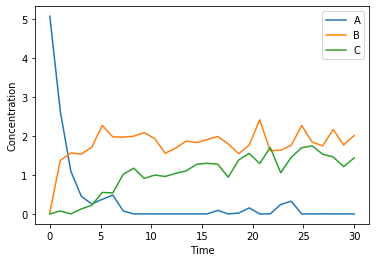

In [8]:
mf.plotTimeSeries(obs_data, columns=['A', 'B', 'C'])

## Candidate models

In [9]:
models = []
parameters_list = []
# Model used in this example
model = """
    # Model 1
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0
"""
parameters_list.append(mf.makeParameters(constants=['k1', 'k2']))
models.append(model)

model = """
     # Model 2
     A -> B; k1*A
     A -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0
"""
parameters_list.append(mf.makeParameters(constants=['k1', 'k2']))
models.append(model)


model = """
     # Model 3
     A + B -> C; k1*A
      
     A = 2.5;
     B = 2.5;
     C = 0;
     k1 = 0
"""
parameters_list.append(mf.makeParameters(constants=['k1']))
models.append(model)

In [10]:
for model in models:
    print(model)


    # Model 1
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0


     # Model 2
     A -> B; k1*A
     A -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0


     # Model 3
     A + B -> C; k1*A
      
     A = 2.5;
     B = 2.5;
     C = 0;
     k1 = 0



## Model Analysis

In [13]:
# Evaluation using cross validation
for model, parameters in zip(models, parameters_list):
    print("\nModel: %s" % model)
    _, rsqs = mf.crossValidate(obs_data, model=model, parameters=parameters, 
                                         num_points=num_points, 
                                         method='leastsq',
                                         sim_time=sim_time,
                                         num_folds=3)
    print(rsqs)


Model: 
    # Model 1
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0

[0.6797608925754041, 0.3422202383196985, 0.28112643949484595]

Model: 
     # Model 2
     A -> B; k1*A
     A -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0

[0.40194924126958376, -0.85706541236906, -0.2795657966830931]

Model: 
     # Model 3
     A + B -> C; k1*A
      
     A = 2.5;
     B = 2.5;
     C = 0;
     k1 = 0

[0.1056497994982698, 0.003617747331281951, -0.14028579224675686]


In [14]:
list_parameters, rsqs = mf.crossValidate(full_obs_data, model=model0, parameters=unfitted_parameters, 
                                         num_points=num_points, method='leastsq',
                                         sim_time=sim_time,
                                         num_folds=3)
rsqs

[0.9729753771802612, 0.9567172030592419, 0.9346978735394268]

In [15]:
mf.doBootstrap(full_obs_data, model=model0, parameters=unfitted_parameters, 
                                         num_points=num_points, method='leastsq',
                                         sim_time=sim_time, count=5)

{'k1': array([0.82741298, 1.48096463]),
 'k2': array([0.31626421, 0.58676075]),
 'k3': array([0.09718301, 0.22875522])}

In [16]:
mf.doBootstrap(obs_data, model=models[0], parameters=parameters_list[0], 
                                         num_points=num_points,
                                         sim_time=sim_time, count=5)

{'k1': array([0.32507359, 1.10336572]), 'k2': array([0.0418479 , 0.04445633])}